In [1]:
import numpy as np
np.set_printoptions(edgeitems=3, infstr='inf', linewidth=75, nanstr='nan',
                   precision=8, suppress=False, threshold=3, formatter=None)

import pyrrhenius.database as phsd

ecdatabase = phsd.Database()

In [2]:
nv17HD  = ecdatabase.get_model('nv_17_ol[010]') # Novella et al. 2017's hydrogen diffusion equation
print(nv17HD)

seo3dry =  ecdatabase.get_model('SEO3_ol') # Constable et al. 2006's dry olivine equation
print(seo3dry)

combined = nv17HD+seo3dry
print(combined)

nv_17_ol[010]:{NerstEinstein2 1.8e+42(nan) 10^-5.0(0.9) 1.782654381(0.196921123) }
SEO3_ol:{e*(5.06e+24(nan) exp( -0.357(nan)/kT) 3.33e+24(nan) exp( -0.02(nan)/kT) fO2^0.166667(nan))*1.22e-05(nan) exp( -1.05(nan)/kT) + e*(4.58e+26(nan) exp( -0.752(nan)/kT) 6.209999999999999e+30(nan) exp( -1.83(nan)/kT) fO2^0.166666667(nan))*5.44e-06(nan) exp( -1.09(nan)/kT)}
nv_17_ol[010]+SEO3_ol:{nv_17_ol[010]:{NerstEinstein2 1.8e+42(nan) 10^-5.0(0.9) 1.782654381(0.196921123) }+SEO3_ol:{e*(5.06e+24(nan) exp( -0.357(nan)/kT) 3.33e+24(nan) exp( -0.02(nan)/kT) fO2^0.166667(nan))*1.22e-05(nan) exp( -1.05(nan)/kT) + e*(4.58e+26(nan) exp( -0.752(nan)/kT) 6.209999999999999e+30(nan) exp( -1.83(nan)/kT) fO2^0.166666667(nan))*5.44e-06(nan) exp( -1.09(nan)/kT)}}


In [3]:
model = ecdatabase.get_model('SEO3_ol')
model.get_conductivity(T=1000, P=1.0, logfo2=10**-11)

array([2.73808615e-05])

In [4]:
T = np.ones(4)*700 # in degrees K
print(T.shape)
model.get_conductivity(T=T, P=1.0, logfo2=10**-11)

(4,)


array([1.29536636e-07, 1.29536636e-07, 1.29536636e-07, 1.29536636e-07])

In [5]:
T = np.ones((4,4))*700 # in degrees K
print(T.shape)
model.get_conductivity(T=T, P=1.0, logfo2=10**-11)

(4, 4)


array([[1.29536636e-07, 1.29536636e-07, 1.29536636e-07, 1.29536636e-07],
       [1.29536636e-07, 1.29536636e-07, 1.29536636e-07, 1.29536636e-07],
       [1.29536636e-07, 1.29536636e-07, 1.29536636e-07, 1.29536636e-07],
       [1.29536636e-07, 1.29536636e-07, 1.29536636e-07, 1.29536636e-07]])

In [6]:
try:
    model.get_conductivity(T=T)
except AssertionError as e:
    print(e)

Did not provide an oxygen fugacity value!


In [7]:
model.print_required_parameters()

********************
Required Keywords
********************

Intrinsic Arguments
--------------------

Volatile Arguments
--------------------

Electronic Conduction Arguments
--------------------
*logfo2

Diffusion Conduction Arguments
--------------------

Polymerizing Agent Arguments
--------------------


In [8]:
import pyrrhenius.database as phsd

ecdatabase = phsd.Database()

ecdatabase.get_model_list_for_phase('olivine')

['SEO2_ol',
 'xu_2000_ol[001]',
 'xu_2000_ol[010]',
 'xu_2000_ol[100]',
 'xu_2000_poly_ol',
 'dF_05_ol[100]',
 'dF_05_ol[010]',
 'dF_05_ol[001]',
 'SEO3_ol',
 'wang_06_ol',
 'dk_2009_ol',
 'ty_09_dry_ol',
 'ty_09_ol',
 'ty_12_ol',
 'yang_12b_ol[100]',
 'yang_12b_ol[010]',
 'yang_12b_ol[001]',
 'gar_14_bell_ol[100]',
 'gar_14_bell_ol[010]',
 'gar_14_bell_ol[001]',
 'gar_14_withers_ol[100]',
 'gar_14_withers_ol[010]',
 'gar_14_withers_ol[001]',
 'y_16_ol[100]',
 'y_16_ol[010]',
 'y_16_ol[001]',
 'nv_17_ol[100]',
 'nv_17_ol[010]',
 'nv_17_ol[001]',
 'sun_19ol[100]',
 'sun_19ol[001]',
 'fei_20_ol[100]',
 'fei_20_ol[010]',
 'fei_20_ol[001]',
 'fei_20_ol_ionic[100]',
 'fei_20_ol_ionic[010]',
 'fei_20_ol_ionic[001]']

/var/folders/5h/95y6jy4s2pb02h07pf5q7dgc0000gn/T/ipykernel_98084/3634801195.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


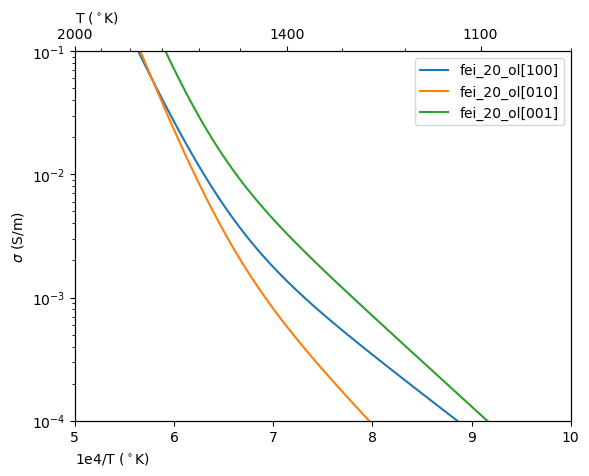

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pyrrhenius.database as phsd
import pyrrhenius.utils as pyhutils

ecdatabase = phsd.Database()

models = ['fei_20_ol[100]','fei_20_ol[010]', 'fei_20_ol[001]']


T = np.linspace(400,1800,num=120) # temperature in kelvin

fig, ax = plt.subplots()
linear_major_ticks = np.asarray([2000,1400,1100,900,800,700,600,500,400])
pyhutils.format_ax_arrhenian_space(ax,linear_major_ticks=linear_major_ticks,xlim=[5,10])
Cw = 100 # 100 ppm water
P = 3 # 3 GPa
for model_id in models:
    ecmodel = ecdatabase.get_model(model_id)
    c = ecmodel.get_conductivity(T=T,Cw=Cw,P=P)
    ax.plot(1e4/T,c,label=model_id)
ax.legend()
ax.set_ylim([1e-4,1e-1])
fig.show()

In [10]:
ecdatabase = phsd.Database()
ecdatabase.create_isotropic_models()
ecdatabase.get_model_list_for_phase('olivine')[-12:]

['fei_20_ol_ionic[010]',
 'fei_20_ol_ionic[001]',
 'isotropic_model:dF_05_ol[100]+dF_05_ol[010]+dF_05_ol[001]',
 'isotropic_model:fei_20_ol[100]+fei_20_ol[010]+fei_20_ol[001]',
 'isotropic_model:fei_20_ol_ionic[100]+fei_20_ol_ionic[010]+fei_20_ol_ionic[001]',
 'isotropic_model:gar_14_bell_ol[100]+gar_14_bell_ol[010]+gar_14_bell_ol[001]',
 'isotropic_model:gar_14_withers_ol[100]+gar_14_withers_ol[010]+gar_14_withers_ol[001]',
 'isotropic_model:nv_17_ol[100]+nv_17_ol[010]+nv_17_ol[001]',
 'isotropic_model:sun_19ol[100]+sun_19ol[001]',
 'isotropic_model:xu_2000_ol[001]+xu_2000_ol[010]+xu_2000_ol[100]',
 'isotropic_model:y_16_ol[100]+y_16_ol[010]+y_16_ol[001]',
 'isotropic_model:yang_12b_ol[100]+yang_12b_ol[010]+yang_12b_ol[001]']

/var/folders/5h/95y6jy4s2pb02h07pf5q7dgc0000gn/T/ipykernel_98084/348446302.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


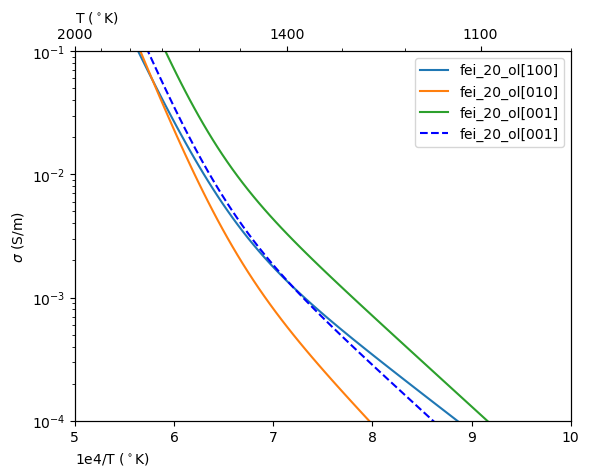

In [11]:
fig, ax = plt.subplots()
linear_major_ticks = np.asarray([2000,1400,1100,900,800,700,600,500,400])
pyhutils.format_ax_arrhenian_space(ax,linear_major_ticks=linear_major_ticks,xlim=[5,10])
Cw = 100 # 100 ppm water
P = 3 # 3 GPa
for model_id in models:
    ecmodel = ecdatabase.get_model(model_id)
    c = ecmodel.get_conductivity(T=T,Cw=Cw,P=P)
    ax.plot(1e4/T,c,label=model_id)

isotropic_model_id = 'isotropic_model:fei_20_ol[100]+fei_20_ol[010]+fei_20_ol[001]'
ecmodel = ecdatabase.get_model(isotropic_model_id)
c = ecmodel.get_conductivity(T=T,Cw=Cw,P=P)
ax.plot(1e4/T,c,label=model_id,linestyle='--',color='blue')
ax.legend()
ax.set_ylim([1e-4,1e-1])
fig.show()

In [12]:
Cw = 100 # 100 ppm water
P = 3 # 3 GPa
T = np.linspace(1000,1500,num=10)
physiokwargs = {'Cw':Cw,'P':P,'T':T}
conductivity = ecmodel.get_conductivity(**physiokwargs)
conductivity

array([9.54130942e-06, 2.32192032e-05, 5.17207779e-05, ...,
       1.21434671e-03, 2.18061386e-03, 4.07700586e-03])

In [13]:
conductivity = ecmodel.get_conductivity(averaging='max_aniso',**physiokwargs)
conductivity

array([2.40550006e-05, 5.85446664e-05, 1.30385472e-04, ...,
       2.92689115e-03, 5.07131923e-03, 9.06023794e-03])

In [14]:
conductivity = ecmodel.get_conductivity(averaging='min_aniso',**physiokwargs)
conductivity

array([1.85038640e-06, 5.17376148e-06, 1.30593266e-05, ...,
       5.02547031e-04, 9.90019245e-04, 2.03825870e-03])

In [15]:
conductivity = ecmodel.get_conductivity(crystal_direction='[100]',**physiokwargs)
conductivity

array([1.95144420e-05, 4.13283627e-05, 8.12540766e-05, ...,
       1.21743230e-03, 2.06524565e-03, 3.66965383e-03])

In [16]:
conductivity = ecmodel.get_conductivity(crystal_direction=0.5,**physiokwargs)
conductivity

array([1.29526935e-05, 3.18592139e-05, 7.17223991e-05, ...,
       1.71471909e-03, 3.03066924e-03, 5.54924832e-03])

In [17]:
import numpy as np

# Provide an array of anisotropic factors for batch querying
factors = np.random.uniform(0,1,size=len(T))
print(f'Anisotropic Factors: {factors}')
conductivity = ecmodel.get_conductivity(crystal_direction=factors,**physiokwargs)
conductivity

Anisotropic Factors: [0.62761196 0.06032951 0.4801983  ... 0.13951965 0.96086743 0.23703155]


array([1.57862678e-05, 8.39360216e-06, 6.93991416e-05, ...,
       8.40790685e-04, 4.91160747e-03, 3.70268933e-03])

[1.85038640e-06 5.17376148e-06 1.30593266e-05 ... 5.02547031e-04
 9.90019245e-04 2.03825870e-03]
[10.          9.47368421  9.         ...  7.2         6.92307692
  6.66666667]
[2.40550006e-05 5.85446664e-05 1.30385472e-04 ... 2.92689115e-03
 5.07131923e-03 9.06023794e-03]
[10.          9.47368421  9.         ...  7.2         6.92307692
  6.66666667]
[9.54130942e-06 2.32192032e-05 5.17207779e-05 ... 1.21434671e-03
 2.18061386e-03 4.07700586e-03]
[10.          9.47368421  9.         ...  7.2         6.92307692
  6.66666667]


/var/folders/5h/95y6jy4s2pb02h07pf5q7dgc0000gn/T/ipykernel_98084/3978061993.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


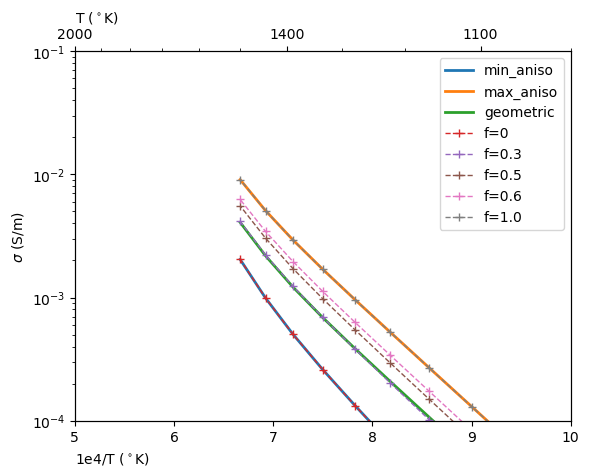

In [18]:
fig, ax = plt.subplots()
linear_major_ticks = np.asarray([2000,1400,1100,900,800,700,600,500,400])
pyhutils.format_ax_arrhenian_space(ax,linear_major_ticks=linear_major_ticks,xlim=[5,10])

# Physiochemical states
Cw = 100 #(100 ppm water)
P = 3 # 3 GPa
T = np.linspace(1000,1500,num=10)
physiokwargs = {'Cw':Cw,'P':P,'T':T}


isotropic_model_id = 'isotropic_model:fei_20_ol[100]+fei_20_ol[010]+fei_20_ol[001]'
ecmodel = ecdatabase.get_model(isotropic_model_id)

for averaging in ['min_aniso','max_aniso','geometric']:
    c = ecmodel.get_conductivity(averaging=averaging,**physiokwargs)
    print(c)
    print(1e4/T)
    ax.plot(1e4/T,c,label=averaging,linewidth=2)

for factor in [0,0.3,0.5,0.6,1.0]:
    c = ecmodel.get_conductivity(crystal_direction=factor,**physiokwargs)
    ax.plot(1e4/T,c,label=f'f={factor}',linestyle='--',linewidth=1,marker='+')
ax.legend()
ax.set_ylim([1e-4,1e-1])
fig.show()

In [19]:
from pyrrhenius.database import Database

ecdatabase = Database()

dry_model = ecdatabase.get_model('SEO3_ol')
novella_models =['nv_17_ol[100]','nv_17_ol[010]','nv_17_ol[001]']
fei_models = ['fei_20_ol_ionic[100]','fei_20_ol_ionic[010]', 'fei_20_ol_ionic[001]']

In [20]:
from pyrrhenius.utils import calc_QFM
T = np.linspace(1000,2300,num=10) # in K
P = np.linspace(3,10,num=10) # in GPa
qfm = calc_QFM(T,P)
Cw = 300 # (in ppm)
physiochem = {'T':T,'P':P,'Cw':Cw,'logfo2':qfm}
models_to_composite = novella_models+fei_models

for id in models_to_composite:
    print('*'*20)
    print(id)
    ecmodel = ecdatabase.get_model(id)
    print(ecmodel.get_conductivity(**physiochem))
    new_ecmodel = ecmodel + dry_model
    print(new_ecmodel.get_conductivity(**physiochem))
    print(f'old ec model representation:{ecmodel}')
    print(f'new ec model representation:{new_ecmodel}')
    ecdatabase.register_new_model(new_ecmodel)

********************
nv_17_ol[100]
[3.50705561e-05 9.90949892e-04 1.30542766e-02 ... 1.80010942e+01
 4.20468450e+01 8.79148178e+01]
[3.62561002e-05 1.00357394e-03 1.31427481e-02 ... 1.83972519e+01
 4.37197216e+01 9.39204356e+01]
old ec model representation:nv_17_ol[100]:{NerstEinstein2 1.8e+42(nan) 10^-0.7(0.9) 2.373417751(0.186556854) }
new ec model representation:nv_17_ol[100]+SEO3_ol:{nv_17_ol[100]:{NerstEinstein2 1.8e+42(nan) 10^-0.7(0.9) 2.373417751(0.186556854) }+SEO3_ol:{e*(5.06e+24(nan) exp( -0.357(nan)/kT) 3.33e+24(nan) exp( -0.02(nan)/kT) fO2^0.166667(nan))*1.22e-05(nan) exp( -1.05(nan)/kT) + e*(4.58e+26(nan) exp( -0.752(nan)/kT) 6.209999999999999e+30(nan) exp( -1.83(nan)/kT) fO2^0.166666667(nan))*5.44e-06(nan) exp( -1.09(nan)/kT)}}
********************
nv_17_ol[010]
[1.66824179e-06 1.98422195e-05 1.33579444e-04 ... 2.72729707e-02
 5.06947104e-02 8.68055409e-02]
[2.85378588e-06 3.24662662e-05 2.22050934e-04 ... 4.23430669e-01
 1.72357131e+00 6.09242335e+00]
old ec model repre

/Volumes/X9 Pro/Recovered Data  - EXFAT/MT_RESEARCH/2D_Petrology/mineral_conductivity/mineralconductivities/pyrrhenius/database.py:60: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.database = pd.concat([self.database, db_row], ignore_index=True)
/Volumes/X9 Pro/Recovered Data  - EXFAT/MT_RESEARCH/2D_Petrology/mineral_conductivity/mineralconductivities/pyrrhenius/database.py:60: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.database = pd.concat([self.database, db_row], ignore_index=True

In [21]:
ecdatabase.create_isotropic_models()
model_list = ecdatabase.get_model_list_for_phase('olivine')
model_list[-20:]

['fei_20_ol_ionic[010]',
 'fei_20_ol_ionic[001]',
 'nv_17_ol[100]+SEO3_ol',
 'nv_17_ol[010]+SEO3_ol',
 'nv_17_ol[001]+SEO3_ol',
 'fei_20_ol_ionic[100]+SEO3_ol',
 'fei_20_ol_ionic[010]+SEO3_ol',
 'fei_20_ol_ionic[001]+SEO3_ol',
 'isotropic_model:dF_05_ol[100]+dF_05_ol[010]+dF_05_ol[001]',
 'isotropic_model:fei_20_ol[100]+fei_20_ol[010]+fei_20_ol[001]',
 'isotropic_model:fei_20_ol_ionic[100]+fei_20_ol_ionic[010]+fei_20_ol_ionic[001]',
 'isotropic_model:fei_20_ol_ionic[100]+SEO3_ol+fei_20_ol_ionic[010]+SEO3_ol+fei_20_ol_ionic[001]+SEO3_ol',
 'isotropic_model:gar_14_bell_ol[100]+gar_14_bell_ol[010]+gar_14_bell_ol[001]',
 'isotropic_model:gar_14_withers_ol[100]+gar_14_withers_ol[010]+gar_14_withers_ol[001]',
 'isotropic_model:nv_17_ol[100]+nv_17_ol[010]+nv_17_ol[001]',
 'isotropic_model:nv_17_ol[100]+SEO3_ol+nv_17_ol[010]+SEO3_ol+nv_17_ol[001]+SEO3_ol',
 'isotropic_model:sun_19ol[100]+sun_19ol[001]',
 'isotropic_model:xu_2000_ol[001]+xu_2000_ol[010]+xu_2000_ol[100]',
 'isotropic_model:y_16_

In [22]:
from pyrrhenius.utils import calc_QFM
T = np.linspace(1000,3000,num=10) # in K
P = np.linspace(3,10,num=10) # in GPa
qfm = calc_QFM(T,P)
Cw = 300# (in ppm)
physiochem = {'T':T,'P':P,'Cw':Cw,'logfo2':qfm}

/var/folders/5h/95y6jy4s2pb02h07pf5q7dgc0000gn/T/ipykernel_98084/2995247542.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


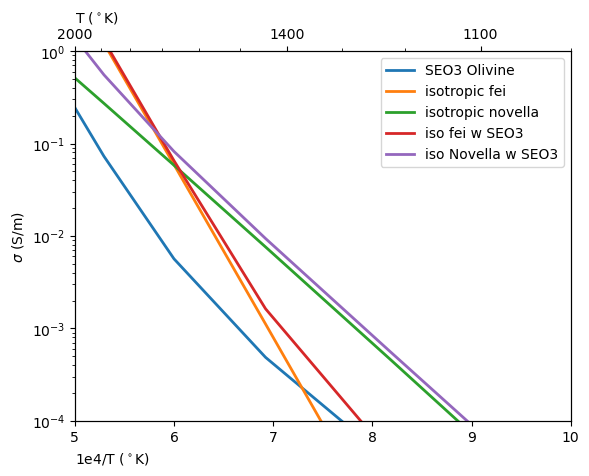

In [23]:
fig, ax = plt.subplots()
linear_major_ticks = np.asarray([2000,1400,1100,900,800,700,600,500,400])
pyhutils.format_ax_arrhenian_space(ax,linear_major_ticks=linear_major_ticks,xlim=[5,10])


fei_ionic_isotropic  = 'isotropic_model:fei_20_ol_ionic[100]+fei_20_ol_ionic[010]+fei_20_ol_ionic[001]'
novella_isotropic    = 'isotropic_model:nv_17_ol[100]+nv_17_ol[010]+nv_17_ol[001]'
fei_ionic_compound   = 'isotropic_model:fei_20_ol_ionic[100]+SEO3_ol+fei_20_ol_ionic[010]+SEO3_ol+fei_20_ol_ionic[001]+SEO3_ol'
novella_wet_compound = 'isotropic_model:nv_17_ol[100]+SEO3_ol+nv_17_ol[010]+SEO3_ol+nv_17_ol[001]+SEO3_ol'
ecmodel = ecdatabase.get_model('SEO3_ol')
c = ecmodel.get_conductivity(**physiochem)
ax.plot(1e4/T,c,label='SEO3 Olivine',linewidth=2)

for label, model_id in zip(['isotropic fei','isotropic novella','iso fei w SEO3', 'iso Novella w SEO3'],
                    [fei_ionic_isotropic,novella_isotropic,fei_ionic_compound,novella_wet_compound ]):
    ecmodel = ecdatabase.get_model(model_id)
    c = ecmodel.get_conductivity(**physiochem)
    ax.plot(1e4/T,c,label=label,linewidth=2)


ax.legend()
ax.set_ylim([1e-4,1])
fig.show()